<a href="https://colab.research.google.com/github/Enoshraju7-prog/ML_Lab_Expts/blob/main/Expts-Code/ML_Lab_Experiment4_Clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MACHINE LEARNING FOR ELECTRONICS ENGINEERS LAB
## Experiment 4: Simple Linear Regression using Python
**Birla Institute of Technology and Science, Pilani, Hyderabad Campus**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt

---
## Q1. Years of Experience vs Salary Analysis

A company wants to analyze the relationship between Years of Experience and Salary (in lakhs) for entry-level data scientists. Given the data below, perform the following analysis:

| Years of Experience (xᵢ) | Salary in Lakhs (yᵢ) |
|--------------------------|----------------------|
| 1                        | 2                    |
| 2                        | 4                    |
| 3                        | 5                    |
| 4                        | 4                    |
| 5                        | 5                    |

### a) Generate data and calculate regression coefficients

Write a Python code to generate the above given data (use NumPy) and import the Scikit-learn library to calculate the regression coefficients. Verify the coefficients with the hand calculation (you can use either formula or matrix-based approach).

**Note:** Since it is a small sample-sized data, there is no need to use a pandas dataframe

In [ ]:
# Generate data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2, 4, 5, 4, 5])

print("Data:")
print("Years of Experience:", X.flatten())
print("Salary (lakhs):", y)

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Get coefficients
beta_1 = model.coef_[0]
beta_0 = model.intercept_

print(f"\nRegression Coefficients (using sklearn):")
print(f"β₀ (Intercept) = {beta_0:.4f}")
print(f"β₁ (Slope) = {beta_1:.4f}")
print(f"\nRegression Equation: ŷ = {beta_0:.4f} + {beta_1:.4f}x")

print("\n Hand calculation verification\n")
n = len(X)
x_mean = np.mean(X)
y_mean = np.mean(y)

# β₁ = Σ(xᵢ - x̄)(yᵢ - ȳ) / Σ(xᵢ - x̄)²
numerator = np.sum((X.flatten() - x_mean) * (y - y_mean))
denominator = np.sum((X.flatten() - x_mean) ** 2)
beta_1_manual = numerator / denominator

# β₀ = ȳ - β₁x̄
beta_0_manual = y_mean - beta_1_manual * x_mean

#print(f"\nHand Calculation Verification:")
print(f"β₀ (Intercept) = {beta_0_manual:.4f}")
print(f"β₁ (Slope) = {beta_1_manual:.4f}")
print(f"\nCoefficients match: {np.isclose(beta_0, beta_0_manual) and np.isclose(beta_1, beta_1_manual)}")

Data:
Years of Experience: [1 2 3 4 5]
Salary (lakhs): [2 4 5 4 5]

Regression Coefficients (using sklearn):
β₀ (Intercept) = 2.2000
β₁ (Slope) = 0.6000

Regression Equation: ŷ = 2.2000 + 0.6000x

 Hand calculation verification

β₀ (Intercept) = 2.2000
β₁ (Slope) = 0.6000

Coefficients match: True


### b) Calculate Residual Standard Error (RSE) and R² statistic

Write a code to calculate the residual standard error (RSE) and the R² statistic using the formula discussed in the lecture class. Verify your results with hand calculation, and verify the R² statistic you have calculated with the built-in r2_score command of the scikit learn library.

**Note:** For model predictions, you can use the model.predict command

In [ ]:
# Get predictions
y_pred = model.predict(X)

print("Actual vs Predicted:")
for i in range(len(y)):
    print(f"x={X[i][0]}, Actual={y[i]}, Predicted={y_pred[i]:.4f}")

# Calculate RSE (Residual Standard Error)
# RSE = sqrt(RSS / (n-2)) where RSS = Σ(yᵢ - ŷᵢ)²
residuals = y - y_pred
RSS = np.sum(residuals ** 2)
RSE = np.sqrt(RSS / (n - 2))

print(f"\nResidual Standard Error (RSE):")
print(f"RSS = {RSS:.4f}")
print(f"RSE = {RSE:.4f}")

# Calculate R² (R-squared)
# R² = 1 - (RSS / TSS) where TSS = Σ(yᵢ - ȳ)²
TSS = np.sum((y - y_mean) ** 2)
R2_manual = 1 - (RSS / TSS)

print(f"\nR² Statistic (Manual Calculation):")
print(f"TSS = {TSS:.4f}")
print(f"R² = {R2_manual:.4f}")

# Verify with sklearn
R2_sklearn = r2_score(y, y_pred)
print(f"\nR² Statistic (sklearn r2_score): {R2_sklearn:.4f}")
print(f"R² values match: {np.isclose(R2_manual, R2_sklearn)}")

Actual vs Predicted:
x=1, Actual=2, Predicted=2.8000
x=2, Actual=4, Predicted=3.4000
x=3, Actual=5, Predicted=4.0000
x=4, Actual=4, Predicted=4.6000
x=5, Actual=5, Predicted=5.2000

Residual Standard Error (RSE):
RSS = 2.4000
RSE = 0.8944

R² Statistic (Manual Calculation):
TSS = 6.0000
R² = 0.6000

R² Statistic (sklearn r2_score): 0.6000
R² values match: True


### c) Predict salary for new years of experience

Use the fitted model to predict the salary of the employees for the given years of experience using hand calculation (table below). Verify the hand-calculated results with the model.predict command.

| Years of Experience (xᵢ) | Predicted Salary in Lakhs (yᵢ) |
|--------------------------|---------------------------------|
| 6                        | ?                               |
| 10                       | ?                               |
| 12                       | ?                               |

In [ ]:
# New experience values
X_new = np.array([6, 10, 12]).reshape(-1, 1)

# Prediction using model
y_pred_new = model.predict(X_new)

print("Predictions using model.predict:")
for i in range(len(X_new)):
    print(f"Experience = {X_new[i][0]} years → Predicted Salary = {y_pred_new[i]:.4f} lakhs")

# Hand calculation verification
print(f"\nHand Calculation Verification:")
print(f"Using equation: ŷ = {beta_0:.4f} + {beta_1:.4f}x")
for x_val in X_new.flatten():
    y_manual = beta_0 + beta_1 * x_val
    print(f"x = {x_val}: ŷ = {beta_0:.4f} + {beta_1:.4f}×{x_val} = {y_manual:.4f} lakhs")

Predictions using model.predict:
Experience = 6 years → Predicted Salary = 5.8000 lakhs
Experience = 10 years → Predicted Salary = 8.2000 lakhs
Experience = 12 years → Predicted Salary = 9.4000 lakhs

Hand Calculation Verification:
Using equation: ŷ = 2.2000 + 0.6000x
x = 6: ŷ = 2.2000 + 0.6000×6 = 5.8000 lakhs
x = 10: ŷ = 2.2000 + 0.6000×10 = 8.2000 lakhs
x = 12: ŷ = 2.2000 + 0.6000×12 = 9.4000 lakhs


---
## Q2. California Housing Dataset - Simple Linear Regression

Load the California housing dataset from the scikit learn library (the same way you did it in the Experiment 3 lab) and perform simple linear regression (one feature at a time) for only the following three features: 'HouseAge', 'AveRooms', and 'AveBedrms' (do not worry about other features, consider only these three features).

Note that each feature has approximately 20000 samples/data points. Fit a simple linear regression equation for each of the above three features separately (For example, Estimated Price = β₀ + β₁ × HouseAge).

Estimate/Predict the house price using the fitted model for the following feature values (you can use the model.predict command):

a) When HouseAge is 10 years (Using only Estimated Price = β₀ + β₁ × HouseAge)

b) When AveRooms is 8 rooms

c) When AveBedrms is 4 bedrooms

**Note:** If time permits, you can fit a simple linear regression model by exploring other features in the housing data, such as "Population", "AveOccup", "Longitude", and "Latitude", by considering them separately.

In [ ]:
# Load California Housing dataset
california = fetch_california_housing()
X_cal = pd.DataFrame(california.data, columns=california.feature_names)
y_cal = california.target

print("Dataset loaded successfully")
print(f"Shape: {X_cal.shape}")
print(f"\nFeatures: {california.feature_names}")
print(f"\nFirst 5 rows:")
print(X_cal.head())

Dataset loaded successfully
Shape: (20640, 8)

Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

First 5 rows:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


### a) HouseAge vs Price

In [ ]:
# Simple Linear Regression: HouseAge
X_houseage = X_cal[['HouseAge']]
model_houseage = LinearRegression()
model_houseage.fit(X_houseage, y_cal)

beta_0_ha = model_houseage.intercept_
beta_1_ha = model_houseage.coef_[0]

r2_ha = r2_score(y_cal, model_houseage.predict(X_houseage))

print("HouseAge Model:")
print(f"Equation: Price = {beta_0_ha:.4f} + {beta_1_ha:.4f} × HouseAge")
print(f"R² = {r2_ha:.4f}")

# Predict for HouseAge = 10
pred_ha_10 = model_houseage.predict([[10]])[0]
print(f"\nPrediction for HouseAge = 10 years: ${pred_ha_10:.4f} (in $100,000s)")

HouseAge Model:
Equation: Price = 1.7912 + 0.0097 × HouseAge
R² = 0.0112

Prediction for HouseAge = 10 years: $1.8880 (in $100,000s)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### b) AveRooms vs Price

In [ ]:
# Simple Linear Regression: AveRooms
X_averooms = X_cal[['AveRooms']]
model_averooms = LinearRegression()
model_averooms.fit(X_averooms, y_cal)

beta_0_ar = model_averooms.intercept_
beta_1_ar = model_averooms.coef_[0]
r2_ar = r2_score(y_cal, model_averooms.predict(X_averooms))

print("AveRooms Model:")
print(f"Equation: Price = {beta_0_ar:.4f} + {beta_1_ar:.4f} × AveRooms")
print(f"R² = {r2_ar:.4f}")

# Predict for AveRooms = 8
pred_ar_8 = model_averooms.predict([[8]])[0]
print(f"\nPrediction for AveRooms = 8 rooms: ${pred_ar_8:.4f} (in $100,000s)")

AveRooms Model:
Equation: Price = 1.6838 + 0.0709 × AveRooms
R² = 0.0231

Prediction for AveRooms = 8 rooms: $2.2508 (in $100,000s)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### c) AveBedrms vs Price

In [ ]:
# Simple Linear Regression: AveBedrms
X_avebedrms = X_cal[['AveBedrms']]
model_avebedrms = LinearRegression()
model_avebedrms.fit(X_avebedrms, y_cal)

beta_0_ab = model_avebedrms.intercept_
beta_1_ab = model_avebedrms.coef_[0]
r2_ab = r2_score(y_cal, model_avebedrms.predict(X_avebedrms))

print("AveBedrms Model:")
print(f"Equation: Price = {beta_0_ab:.4f} + {beta_1_ab:.4f} × AveBedrms")
print(f"R² = {r2_ab:.4f}")

# Predict for AveBedrms = 4
pred_ab_4 = model_avebedrms.predict([[4]])[0]
print(f"\nPrediction for AveBedrms = 4 bedrooms: ${pred_ab_4:.4f} (in $100,000s)")

AveBedrms Model:
Equation: Price = 2.1933 + -0.1137 × AveBedrms
R² = 0.0022

Prediction for AveBedrms = 4 bedrooms: $1.7384 (in $100,000s)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Summary of All Three Models

In [ ]:
# Summary table
summary = pd.DataFrame({
    'Feature': ['HouseAge', 'AveRooms', 'AveBedrms'],
    'β₀ (Intercept)': [beta_0_ha, beta_0_ar, beta_0_ab],
    'β₁ (Slope)': [beta_1_ha, beta_1_ar, beta_1_ab],
    'R²': [r2_ha, r2_ar, r2_ab],
    'Test Value': [10, 8, 4],
    'Prediction': [pred_ha_10, pred_ar_8, pred_ab_4]
})

print("\nSummary of Simple Linear Regression Models:")
print(summary.to_string(index=False))

print(f"\nBest Model: {summary.loc[summary['R²'].idxmax(), 'Feature']} (highest R²)")


Summary of Simple Linear Regression Models:
  Feature  β₀ (Intercept)  β₁ (Slope)       R²  Test Value  Prediction
 HouseAge        1.791199    0.009684 0.011156          10    1.888044
 AveRooms        1.683812    0.070869 0.023088           8    2.250762
AveBedrms        2.193266   -0.113714 0.002181           4    1.738409

Best Model: AveRooms (highest R²)


### Optional: Visualize the relationships

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


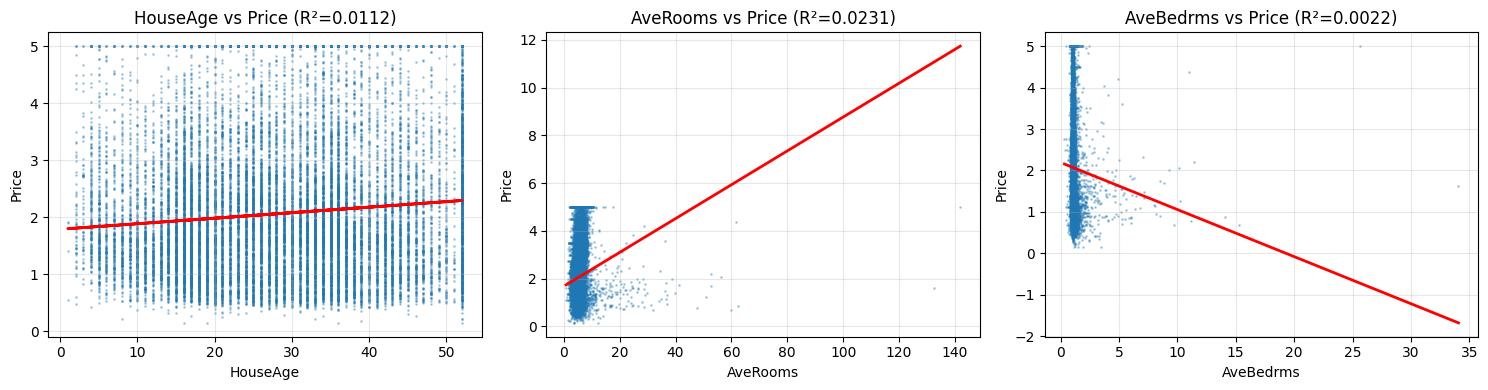

In [ ]:
# Plot all three relationships
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# HouseAge
axes[0].scatter(X_cal['HouseAge'], y_cal, alpha=0.3, s=1)
axes[0].plot(X_cal['HouseAge'], model_houseage.predict(X_houseage), 'r', linewidth=2)
axes[0].set_xlabel('HouseAge')
axes[0].set_ylabel('Price')
axes[0].set_title(f'HouseAge vs Price (R²={r2_ha:.4f})')
axes[0].grid(alpha=0.3)

# AveRooms
axes[1].scatter(X_cal['AveRooms'], y_cal, alpha=0.3, s=1)
X_range = np.linspace(X_cal['AveRooms'].min(), X_cal['AveRooms'].max(), 100).reshape(-1, 1)
axes[1].plot(X_range, model_averooms.predict(X_range), 'r', linewidth=2)
axes[1].set_xlabel('AveRooms')
axes[1].set_ylabel('Price')
axes[1].set_title(f'AveRooms vs Price (R²={r2_ar:.4f})')
axes[1].grid(alpha=0.3)

# AveBedrms
axes[2].scatter(X_cal['AveBedrms'], y_cal, alpha=0.3, s=1)
X_range = np.linspace(X_cal['AveBedrms'].min(), X_cal['AveBedrms'].max(), 100).reshape(-1, 1)
axes[2].plot(X_range, model_avebedrms.predict(X_range), 'r', linewidth=2)
axes[2].set_xlabel('AveBedrms')
axes[2].set_ylabel('Price')
axes[2].set_title(f'AveBedrms vs Price (R²={r2_ab:.4f})')
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()